In [169]:
# Подключение библиотек

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from math import sqrt
from scipy import stats

%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 8, 6

<h2 style="color:black" align="center">2. Сравнение средних</h2>
<h2 style="color:#008B8B">2.1 T-распределение</h2>

**Вспоминаем ЦП**
Мы познакомились с основной идеей статистической проверки гипотез. Основываясь на ЦП мы могли бы предположить, как бы вели себя все выборочные средние, если бы мы многократно повторяли наш эксперемент и основываясь на этой информации рассчитать вероятность получить такое или ещё более выраженное отклонение, чем в нашем исследовании.

Ещё раз обратимся к ЦП теореме. Если мы знаем, что в нашей ГС $\mu = 0$ и $\sigma = 1$ и мы многократно извлекаем выборки из нашей ГС, то все средние значения этих выборок распределятся нормальныи образом вокруг среднего ГС ($\mu$) и со стандартныи отклонением (стандартная ошибка среднего) этого распределения, которую можно рассчитать по следующей формуле:

$se = \frac{\sigma}{n}$

Когда у нас большое количество наблюдений, стандартное отклонение ($sd$) по выборке хорошо описывет соответствующий параметр ГС ($\sigma$), что позволяет нам преобразовать формулу стандартной ошибки среднего $se$ в следющий вид для выборки:

$se = \frac{sd}{n}$

**Что если число наблюдений в выборке оказется небольшим?**
И при большом количестве наблюдений все выборочные средние будут вести себя в соответствии с нормальный распределением. Однако, когда количество наблюдей становится небольшим, особенно когда число наблюдений меньше 30. В этом случае стандартное отклонение по выборке не является хорошим показателем соответствующего параметра ГС ($\sigma$), так как он начинает больше отклоняется от него. Например, в такой ситуцации стандартное отклонение может быть равно $1.53$, когда в ГС стандартное отклонение равно 1. А что более важно, что нарушается предположение о том, что все выборочные средние будут вести себя в соответствии с нормальным законом (ЦПТ).

Причиной таких последствий является маленький объём выборки из-за чего она может оказаться в разных частях распределения, что и смещает все параметры. То есть, чем меньше объём нашей выборки, тем более сильные отклонения от среднего ГС мы будем получать.

**Распределение Стьюдента:** Если число наблюдений невелико и $\sigma$ неизвестно (почти всегда), используется распределение Стьюдента (t-distribution).

Давайте посмотрим, чем оно отличается от нормлаьного распределения: нормальное распределение обозначено розовой линией, а всё остальное - это t-распределение. Основное отличие заключается в том, что у распределения стьюдента более высокие хвосты распределения. Это означает, что в диапозоне превышающем 2 стандартных отклонения в право и влево будет лежать больше наблюдений, чем у нормального распределения.

"Форма" распределения определяется числом степеней свободы (df = n - 1) в нашем случае это k. С увеличением числа df распределение стремится к нормальному.

<img src="img/2_1.png" width="600" height="360">

**Вывод:** В отличии от нормального распределения, где отклонение от среднего строго регламентированно. "Форма" t-распределения будет изменяться в зависимости от числа степеней свободы. То есть, получить более экстримальные отклонения от срденего значения будет более или менее вероятно в зависимости от того, какой объём выборки.

### Пример: 

Посмотрим как знание t-распределения влияет на проверку статиситческих гипотез. Допустим в ГС $\mu = 10$, на выборке мы получили следующие значения: $\bar{x} = 10.8, ~ sd = 2, ~ N = 25$. Если бы мы пользовались стандартной формулой, то мы бы сказали: в соответствии с ЦПТ все выборочные средние распределились бы нормально, вокруг срденего ГС и se можно рассчитать $se = \frac{sd}{\sqrt{n}} = \frac{2}{\sqrt{25}} = 0.4$. 

Теперь необходимо узнать как далеко наше выборочное среднее отклонилось от сренего ГС в еденицах стандартного отклонения так как, если мы найдём данный параметр, то сможем рассчитать вероятность получить такое или ещё более выраженное отклонение. Для этого необходимо найти соответствующее Z-значение:

$Z_{10.8} = \frac{10.8 - 10}{0.4} = 2$ - в нашем эксперементе мы получили отклонение от предпологаемого срденего на два стандартных отклонения вправую сторону.

Найдём вероятность получить такое или ещё более выраженное отклонение:s

In [14]:
# Для нормального распределения
2 * (stats.norm.cdf(-2))

0.04550026389635839

Получаем, что p-value меньше чем 0.05, поэтому мы можем отклонить нулевую гипотезу, согласно которой наша выборка принадлежит ГС со средним равным 10. Но как мы сказали, при небольшом объёме выборке распределение выборочных средних будет отличаться от нормального и вероятность получить более выраженные отклонения от среднего будет выше. Рассчитаем такую вероятность в случае t-распределения:

In [15]:
from scipy import stats

t_value = 2
n = 25
df = n - 1

p = 2 * (1 - stats.t.cdf(t_value, df))
p

0.056939849936591624

Исходя из этого, мы уже не можем отклонить нулевую гипотезу, так как p-value > 0.05. t-критерий рассчитывается также как и z-значение: 

$t_i = \frac{\bar{x_i} - \mu}{se}$

В случае z-значения мы делили на $\sigma$ но $se$ представляет из себя аналог только среди выборочных средних. И $\bar{x_i}$ - это выборочное срденее из которого мы вычитаем уже не выборочноее срденее, а среднее ГС.

### О t-распределении

Вернемся к предельной центральной теореме, мы уже узнали, что если некий признак в генеральной совокупности распределен нормально (не обязательно) со средним $\mu$ и стандартным отклонением $\sigma$, и мы будем многократно извлекать выборки одинакового размера $n$, и для каждой выборки рассчитывать, как далеко выборочное среднее $\bar{X}$ отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:

$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$

то эта величина $z$ будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности - $\sigma$. Ранее мы уже обсуждали, что на практике $\sigma$ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.

Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t-распределения.

$t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{n}}}$

таким образом, в случае неизвестной $\sigma$ мы всегда будем иметь дело с t-распределением. На этом этапе вы должны с негодованием спросить меня, почему же мы применяли z-критерий в первом модуле курса, для проверки гипотез, используя выборочное стандартное отклонение?

Мы уже знаем, что при довольно большом объеме выборки (обычно в учебниках приводится правило, n > 30) t - распределение совсем близко подбирается к нормальному распределению:

Поэтому иногда, для простоты расчетов говорится, что если n > 30, то мы будем использовать свойства нормального распределения для наших целей. Строго говоря, это конечно неправильный подход, который часто критикуют. В до компьютерную эпоху этому было некоторое объяснение, чтобы не рассчитывать для каждого n больше 30 соответствующее критическое значение t - распределения, статистики как бы округляли результат и использовали нормальное распределение для этих целей. Сегодня, конечно, с этим больше никаких проблем нет, и все статистические программы, разумеется, без труда рассчитают все необходимые показатели для t - распределения с любым числом степеней свободы. Действительно при выборках очень большого объема t - распределение практически не будет отличаться от нормального, однако, хоть и очень малые но различия все равно будут.

Поэтому, правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. Поэтому в дальнейшем мы всегда будем использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

<h2 style="color:#008B8B">2.2 Сравнение двух средних</h2>

### Критерий t-Стьюдента

Критерий, который позволяет сравнивать две выборки между собой (два выборочных средних), называется парный t-тест или просто, критерий t-Стьюдента.

Предположим, мы хотим сравнить два средних выборочных значения. $\bar{x_1}$ рассчитанное на выборке со стандартным отклоенеием $sd_1$ и с числом элементов $n_1$ и выборочное значение $\bar{x_2}$, которое также рассчитано основываясь на данных второй выборки $sd_2, n_2$.

Изначально необходимо сформулирвоать статистические гипотезы:

$H_0 \mu_1 = \mu_2$ - лекарство не работает, выборки принадлежат одной ГС.

$H_1 \mu_1 \ne \mu_2$ - лекарство работает, выборки принадлежат разным ГС.

Принимаем факт того, что верна нулевая гипотеза. Если мы много раз будем извлекать из ГС по паре выборок и каждый раз рассчитывали разность между двумя выборочными значениями $\bar{x_1} - \bar{x_2}$, то эта величина распределилась бы вокрут соответствующего значения в ГС. Если мы предположили что в ГС два средних равны, то и срденее значение разности двух средних равнялось бы нулю $\mu_1 - \mu_2 = 0$. При этом, стандартное отклонение (стандартная ошибка среднего) данного распределения рассчитывалась бы следующим образом:

$se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}$

**Почему формула имеет такой вид?**

Дисперсия для данного распределнеия будет равна сумме дисперсии первой выборки и второй:

$D = D_1 + D_2$

Насколько мы знаем, что $SE = \sqrt{D}$. Но мы можем расписать нашу дисперсию следующим образом $\sqrt{D} = \sqrt{D_1 + D_2}$.

Но $se^2 = D$, так как $se$ - это корень из дисперсии. Следовательно стандартная ошибка данного распределения равна:

$SE = \sqrt{D} = \sqrt{D_1 + D_2} = \sqrt{SE_1^2 + SE_2^2}$

**Продолжим рассуждения**

При большом количестви наблюдений можно сказать что, распределение разности между двумя средними значениями приняло бы нормальный вид в соответствии с ЦПТ. Более точно, такое распределение будет соответствовать t-распределению с числом степеней свобод, которое рассчитывается:

$df = n_1 - 1 + n_2 - 1$

Основываясь на данной информации можно рассчитать, насколько далеко наша разность между двумя средними значениями отклонилась от предполагаемого показателя ГС. Тем самым можно рассчитать вероятность получить такие или ещё более выраженные различия при условии, что верна нулевая гипотеза.

Запишем формулу t-критерия: Для этого из нашей разности выборочных средних вычитаем соответствующее значение ГС (Аналогично, как до этого рассчитывался t-критерий)

$t = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{sd_1^2}{n} + \frac{sd_2^2}{n}}}$

Мы предположили, что средние в ГС у нас идентичны, поэтому разность в ГС для средних будет равнятся нулую $\mu_1 - \mu_2 = 0$, тем самым мы можем упросить нашу формлу:

$t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{sd_1^2}{n} + \frac{sd_2^2}{n}}}$

Рассчитав соответствующее t-значение и зная число степеней свобод, мы можем рассчитать p-value.

### Пример 1

Процесс денатурации ДНК представляет разрушение водородных связей между двумя цепями этой молекулы и очень сильно зависит от температуры, которой мы воздействуем на молекулу.

При сравнении двух видов между собой в исследовании были получены следующие различия в срденей температуре плавления ДНК:

Вид 1 : $\bar{x} = 89.9, sd = 11,3, n = 20$

Вид 2 : $\bar{x} = 80.7, sd = 11,7, n = 20$

Строим гипотезы:

$H_0: \mu_{1 вид} = \mu_{2 вид}$

$H_2: \mu_{1 вид} \ne \mu_{2 вид}$

Рассчитаем t-критерий:


$t = \frac{89.9 - 80.7}{\sqrt{\frac{11.3^2}{20} + \frac{11.7^2}{20}}} = 2.5$

Тем самым, наша разность между средними отклонилась от предпологаемого значения в ГС  на 2.5 стандартных отклонений вправо. Давайте рассчитаем вероятность, получить такое или ещё более выраженное отклонение при условии, что верна нулевая гипотеза:

$df = 40 - 2 = 38$

p_value = 0.0167

p_value оказался меньше чем 0.05, значит мы обнаружили статистически значимые различия в средней температуре плавления двух видов.

### Визуализация результатов

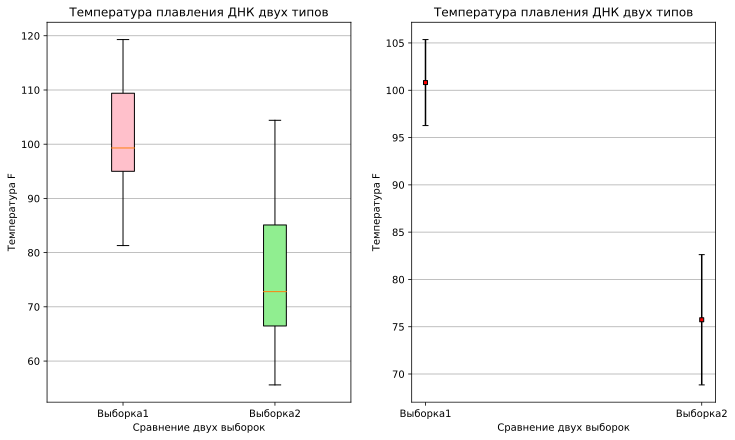

In [211]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

**Вывод:** Применяя критерий t-Стьюдента желательно чтоб дисперсия внутри наших групп были приблизительно одинаковыми - требование гомогенности дисперсий. Проверить данное требование можно используя критерий Левена и критерий Фишера.

Если объём выборки меньше 30, то важным требованием является нормальность распределния признаков наших двух выборок. Если количество наблюдей больше 30 и распределение отличается от нормального, то t-тест тоже хорошо справляется с поставленной задачей. 

(x1-x2)↑ → t↑ (чем больше разница между средними в выборках, тем больше t-критерий)

sd↓ → t↑

n↑ → t↑

t↑ → p↓

### Задача 1

Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала, особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала мы использовали формулу $\bar{x}\pm 1,96*\frac{sd_{x}}{\sqrt{n}}$

Однако 95% всех наблюдений в случае t-распределения могут лежать в более широком диапазоне. 

Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:

$\bar{X}=89,9\quad sd=11,3\quad n=20$

Для этого определите, в каком диапазоне находится 95 % наблюдений у соответствующего t - распределения (df = n -1) и используйте это значение вместо коэффициента 1,96. 

Давайте воспользуемся таблицей критических значений для t - распределения для нахождения нужного t - значения:

http://www.medcalc.org/manual/t-distribution.php

В этой таблице нас интересует столбец, где A=0,95 (область под кривой). На пересечении этого столбца и строки с нужным числом степеней свободы и находится интересующее нас значение.

**Решение:**

В таблице по ссылке находим, в диапазоне скольких сигм от среднего находится 95% площади под кривой t-распределения. Ищем пересечение строки DF (в нашем случае количество степеней свободы равно 20-1=19) и столбца P=0.05 A=0.95. Находим значение, равное 2.093. То есть, в нашем t-распределении (для которого DF=19) 95% площади под кривой находится в диапазоне 2.093 сигм от среднего.
Теперь посчитаем ошибку среднего:
$se = {sd_{x} \over \sqrt{n}}={11.3 \over \sqrt{20}} = 2,526756815$

Итак, наш 95%-ный доверительный интервал должен выглядеть следующим образом:
$\overline{X}{\pm {2.093se}}$

Теперь рассчитаем границы доверительного интервала:

$\overline{X}+{2.093se}=89,9+{2.093}\times{2,526756815}=95,18850201\approx{95.19}$


$\overline{X}-{2.093se}=89,9-{2.093}\times{2,526756815}=84,61149799 \approx{84.61} $

Соответственно, наш 95%-ный доверительный интервал [84,61 ; 95,19].

### Задача 2

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.
Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.


Примечание

Рассчитав t - значение вы можете сравнить его с табличным, чтоб принять статистическое решение: отклонять ли нулевую гипотезу. http://www.medcalc.org/manual/t-distribution.php

Опять же обратимся к таблице t - значений, как и в предыдущем задании найдем критическое значение для нашего эксперимента (на пересечении строки c нужным числом степеней свободы  и столбца, где P=0.05). 
Если рассчитанное вами t-значение больше табличного: отклоняем нулевую гипотезу при p < 0.05.

**Решение:**

Сначала посчитаем ошибку среднего:
$se=\sqrt{\frac{sd_{1}^{2}}{n_1}+\frac{sd_{2}^{2}}{n_2}}={\sqrt{\frac{9^{2}}{100}+\frac{10^{2}}{100}}}=\sqrt{1.81}\approx 1.3453624$

А теперь рассчитаем t-значение (напомним, что при верности нулевой гипотезы две выборки принадлежат одной генеральной совокупности, а не двум разным, и потому разность средней генеральной совокупности, из которой взята первая выборка, и средней генеральной совокупности, из которой взята вторая выборка, будет равняться нулю, т.е. $M_1-M_2=0$, так как при верности нулевой гипотезы $M_1=M_2$):

$t=\frac{\overline{({X}_1}-\overline{{X}_2})-(M_1-M_2)}{se}=\frac{(45-34)-0}{1.3453624}=\frac{11}{1.3453624}\approx 8.17623564$

То есть, разность между средними двух выборок отклонилась на 8.17633564 сигм от предполагаемого значения генеральной совокупности.

Для расчёта p-значения нам также понадобится выяснить число степеней свободы:

$df=n_1+n_2-2=100+100-2=198$

Согласно таблице 95% площади под кривой нашего t-распределения находится в диапазоне примерно 1.972 сигм от среднего. Вместо df=198 для удобства взяли df=200.

1.972 сильно меньше 8.17623564. А это значит, что p-уровень значимости будет также меньше 0.05. То есть, такие отклонения (то есть отклонение в 8.17623564 сигм) при верности нулевой гипотезы будет мала. И мы можем ее отвергнуть.

<h2 style="color:#008B8B">2.4 Однофакторный дисперсионный анализ</h2>

Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 

### Как работает дисперсионный анализ:

Для хорошего понимания данного метода, будем использовать небольшой набор данных, где есть 3 группы и в каждой группе по 3 наблюдения:

In [3]:
data = pd.DataFrame({1: [3, 1, 2], 2:[5, 3, 4], 3: [7, 6, 5]})
data

,1,2,3
0,3,5,7
1,1,3,6
2,2,4,5


**Сформулируем наши гипотезы:**

$H_0: \mu_1 = \mu_2 = \mu_3$ - Между средними значениям нет никаких значимых различий.

$H_1 \mu_1 \ne \mu_2 \ne \mu_3$ - Хотя бы пара средних значимо различаются между собой.

Рассчитаем показатели, которые помогут определить, какая из гипотез является верной.

**Вычислим среднее значение всех наблюдений:**

Мы рассматриваем все наши наблюдения как одну группу:

$$\bar{x} = \frac{3 + 1 + 2 + 5 + 3 + 4 + 7 + 6 + 5}{9} = \frac{36}{9} = 4$$

Среднее значение всех наблюдений нужно для SST.

**Рассчёт SST:**

`SST (Общая сумма квадратов)` - Это показатель характерезует насколько высока изменчивость данных без разделения их на группы. Данный показатель напоминает дисперсию.

$$SST = \sum^{n}_{i=1} {(x_i - \bar{x})^2}$$

$$SST = (3-4)^2 + (1-4)^2 + \ldots + (5-4)^2 = 30$$

**Число степеней свободы:**

`Число степеней свободы` - это число независимых элементов, которые мы имеем при рассчёте некоторого показателя. Если мы знаем общую сумму квадратов, то только 8 элементов предоставляют ценную информацию. Зная эти 8 элементов и общую сумму квадратов, можно найти значение 9-го элемента.

$$df = N - 1 = 9 - 1 = 8$$

**Что даёт значение общей изменчивости данных (Общая сумма квадратов)?**

Общая сумма квадратов зависит от двух факторов:

`SSB (Междугрупповая сумма квадратов)` - Представляет собой изменчивость между группами. Если группы различаются довольно сильно, то и сами значения находятся довольно далеко друг от друга, что тоже влияет на показатель SST.

`SSW (Внутригрупповая сумма квадратов)` - Представляет собой изменчивость внутри каждой группы (между наблюдениями признаков) - показатель дисперсии в каждой из групп). Чем больше данный показатель, тем больше SST.

**Рассчёт SSW** - Это сумма отклонений от среднего для элементов внутри каждой из групп.

Найдём среднее для каждой группы: $X_1 = 2$, $X_2 = 4$, $X_3 = 6$. Теперь для каждой группы можно рассчитать отклонения от среднего значения по этой группе:

$$SSW = (3-2)^2 + (1-2)^2 + (2-2)^2 + (5-4)^2 + \ldots + (5-6)^2 = 6$$

Рассчитаем показатель степеней свободы для SSW. Если мы знаем показатель SSW и групповые средние, то нам достаточно по два элемента из каждой группы, чтобы найти оставшиеся 3 неизвестных элементов

$df = N - m = 9 - 3 = 6$, где m - Это количество групп.

**Рассчёт SSB** 

Для этого необходимо посмотреть, насколько групповые средние, отклоняются от общего среднего.

$$SSB = \sum^{n}_{i=1} {n_i(\bar{x_i} - \bar{x})^2}$$, где $n_i$ - количество элементов в группе i

$$SSB = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$$

Рассчитаем показатель степеней свободы для SSB. Если мы знаем общее групповое среднее то, нам достаточно только двух груповых средних, чтобы задать 3-й неизвестный элемент.

$$df = m  - 1 = 3 - 1 = 2$$

**Результат:**

Мы знаем, что общая изменчивость (SST) равняется 30. Внутригрупповая равнятся (SSW) 6, а междугрупповая (SSB) 24. Если большая  часть общей изменчивости обеспечивается от SSB - Это означает, что наши группы значительно различаются между собой. Если общая часть зависит от SSW - это говорит о том, что группы не различаются и единственная изменчивость которая есть, это изменчивость внутригрупповая.

**Рассчёт основного статистического показателя дисперсионного анализа (F-значение)**

F-значение, которое равняется отношению междугрупповой изменчивости, делённое на соответствующие  число сетпеней свобод к внутрегрупповой изменчивости, делённое на соответствующее число степеней свобод.

$$F = \frac{\frac{SSB}{m - 1}}{\frac{SSW}{N - m}}$$

В нашем случае $F = 12$

### Основная идея статистического вывода

Предположим, что мы многократно повторяем наш эксперемент, при условии, что верна нулевая гипотеза. То есть, мы всегда делаем выборки из 3-х ГС, где среднее значение равно, другими словами из одной ГС выбераем 3 выборки. В большенстве случаев должны будем получать, что средние выборок различались между собой, крайне, незначительно, так как ГС между собой не различаются, они равны. Но внутри выборок всегда будет некая изменчивость, так как значения в каждую выборку попадают разные.

Исходя из этого, верх нашей дроби (междугрупповая изменчивость) F-значения будет стремится к 0. А низ нашей дроби (внутригрупповая изменчивость) будет иметь разное значение в зависимости от выборки. Это должно привести к тому, что F-значение всегда будет небольшим и F-распределение (распределение Фишера) отличается от нормального и имеет выраженную ассиметрию.

Большенство F-значений при равенстве нулевой гипотезы должны быть небольшими. А в нашем случае это значение составило 12.

Рассчитаем вероятность получить такое или ещё более выраженное различие:

In [115]:
from scipy.stats import f_oneway

f_oneway([3, 1, 2], [5, 3, 4], [7, 6, 5])

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

Отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05

### Обозначениях в дисперсионном анализе

Когда мы делим значение межгрупповой суммы квадратов на соответствующее число степеней свободы (число групп минус один), мы тем самым усредняем полученный показатель. Усредненное значение межгрупповой суммы квадратов называется межгрупповым средним квадратом  

$$MS_{bg}=\frac{SSB}{df_{bg}}\quad df_{bg}=m-1\quad$$

Отношение внутригрупповой суммы квадратов к соответствующему числу степеней свободы (число всех наблюдений минус число групп) — это внутригрупповой средний квадрат 

$$MS_{wg}=\frac{SSW}{df_{wg}}\quad df_{wg} = N-m$$

Поэтому формула F-значения (F-отношение) часто записывается:

$$F=\frac{MS_{bg}}{MS_{wg}}$$ 



### Задача 1

В качестве зависимой переменной будет выступать уровень экспрессии гена - это количественный показатель интенсивности синтеза белка в клетке, который оказывает важное влияние на организ в целом.

**Условие задачи:** Генотерапия позволяет корректировать работу дефективного гена, ответсвенного за развитие заболевания. В эксперименте сравнивалась эффективность четырех различных типов терапии. Результаты исследования представлены в таблице:

In [3]:
import pandas as pd

data = pd.read_csv('input/genetherapy.csv')
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [139]:
group_data = data.groupby('Therapy')['expr'].agg(['count', 'mean', 'std'])
group_data

,count,mean,std
Therapy,,,
A,15,99.733333,4.165619
B,15,98.800000,5.894307
C,15,94.400000,5.193402
D,15,92.333333,3.735289


**Сформулируем гипотезы:**

$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$

$H_1: \mu_1 \ne \mu_2 \ne \mu_3 \ne \mu_4$

Для попытки отклонить нулевую гипотезу будем использовать однофакторный дисперсионный анализ. Он называется однофакторным так как, в качестве независимой переменной (в качестве фактора), который мы хотим исследовать каково его влияние на зависимую переменную при одном факторе. В нашем случае зависимая переменная - это выступает уровень экспрессии гена, а в качестве независимой переменной выступает тип терапии.

In [123]:
import pandas as pd
from scipy import stats

print(stats.f_oneway(
    data[data.Therapy == "A"]["expr"], data[data.Therapy == "B"]["expr"],
    data[data.Therapy == "C"]["expr"], data[data.Therapy == "D"]["expr"]))

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)


p-value составил 0.00015 что меньше чем 0.05. Вероятность получить такое или ещё более выраженное отклонение мы можем с вероятностью 0.00015 из-за чего мы можем отклонить нулевую гипотезу. Отклонение нулевой гипотезы позволяет нам сделать следующий вывод: Как минимум две группы значимо различаются.

**Визуализация результатов:**

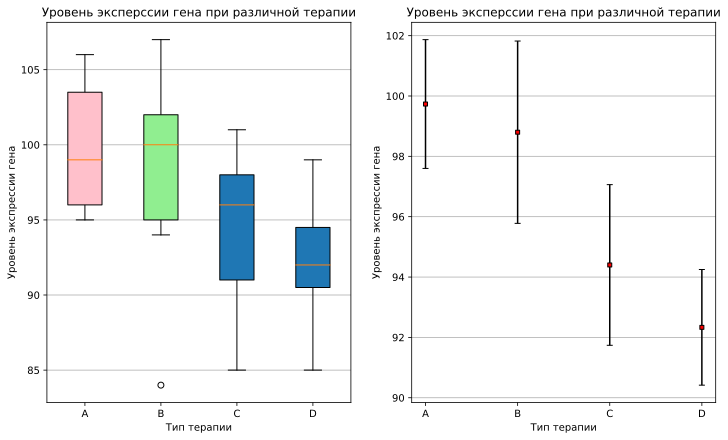

In [214]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

A = data.loc[data['Therapy'] == 'A', 'expr']
B = data.loc[data['Therapy'] == 'B', 'expr']
C = data.loc[data['Therapy'] == 'C', 'expr']
D = data.loc[data['Therapy'] == 'D', 'expr']

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = data.groupby('Therapy')['expr'].agg(['mean', 'std', 'count', 'sem'])
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

# график boxplot
bplot1 = ax1.boxplot([A, B, C, D],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['A', 'B', 'C', 'D']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Уровень эксперссии гена при различной терапии')
    ax.set_xlabel('Тип терапии')
    ax.set_ylabel('Уровень экспрессии гена')
    
plt.show()

Удалось выявить статистически значимую взаимосвязь типа терапии с показателем уровня экспрессии гена (F(3.56)=8,04, p<0,05)

<h2 style="color:#008B8B">2.5 Множественные сравнения в ANOVA</h2>

Множественное сравнение возникает тогда, когда необходимо сравнить не две, а большее количество групп между собой. Почему мы не можем взять критерий t-стьюдента и попарно сравнить все возможные комбинации средних значений?

Смоделируем такую ситуацию. Предствим у нас есть ГС, где некоторый признак распределён нормально с средним равным 0 и дисперсией равной единице.

Из данной ГС будем многокрано извлекать выборки по n-элементов и сравнивать среднее значение этих выборок между собой. Так как ГС одна, то выборки не должны различаться. Но мы будем повторять данную итерацию 1000 раз.

Формируем нормальное распределение:

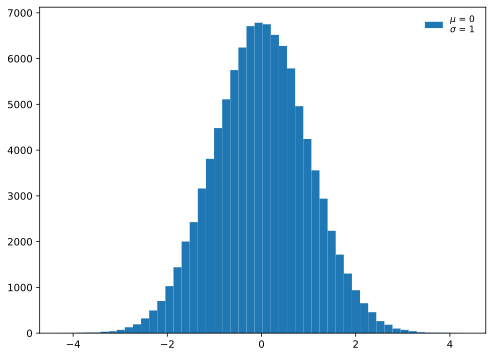

In [181]:
mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 100000)

plt.hist(s, bins=50, label = f'$\mu$ = {mu} \n$\sigma$ = {sigma}')
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.show()

1000 раз извлекаем 2 выборки по 30 элементов и сравниваем их при помощи t-критерия, и различия будем считать значимыми если p-value < 0.05.